In [1]:
# mount on google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/MyDrive/satellite-altimetry-course')


In [5]:
# !pip install cartopy
# !pip install pyrsimg
# !apt-get install hdf5-tools


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  hdf5-tools
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 347 kB of archives.
After this operation, 1,255 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 hdf5-tools amd64 1.10.7+repack-4ubuntu2 [347 kB]
Fetched 347 kB in 1s (256 kB/s)
Selecting previously unselected package hdf5-tools.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../hdf5-tools_1.10.7+repack-4ubuntu2_amd64.deb ...
Unpacking hdf5-tools (1.10.7+repack-4ubuntu2) ...
Setting up hdf5-tools (1.10.7+repack-4ubuntu2) ...
Processing triggers for man-db (2.10.2-1) ...


### **ICESat数据查看**

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from pyrsimg import readTiff, imgShow


In [3]:
path_atl06 = 'data/laser/processed_ATL06_20200806013350_06370802_006_01.h5'
path_rsimg = 'data/rsimg/s2_gla_region_20220707.tif'


In [9]:
# !h5ls $path_atl06
!h5ls $path_atl06/gt2l/land_ice_segments
# !h5ls $path_atl06/orbit_info


atl06_quality_summary    Dataset {1796/Inf}
bias_correction          Group
delta_time               Dataset {1796/Inf}
dem                      Group
fit_statistics           Group
geophysical              Group
ground_track             Group
h_li                     Dataset {1796/Inf}
h_li_sigma               Dataset {1796/Inf}
latitude                 Dataset {1796/Inf}
longitude                Dataset {1796/Inf}
segment_id               Dataset {1796/Inf}
sigma_geo_h              Dataset {1796/Inf}


In [ ]:
with h5py.File(path_atl06,'r') as setp_atl06:
    ## gt1l
    lat_gt1l = setp_atl06['gt1l/land_ice_segments/latitude'][:]
    lon_gt1l = setp_atl06['gt1l/land_ice_segments/longitude'][:]
    elev_gt1l = setp_atl06['gt1l/land_ice_segments/h_li'][:]
    # ## group attributes
    beam_type_gt1l = setp_atl06['gt1l'].attrs["atlas_beam_type"].decode()
    ## gt1r
    lat_gt1r = setp_atl06['gt1r/land_ice_segments/latitude'][:]
    lon_gt1r = setp_atl06['gt1r/land_ice_segments/longitude'][:]
    elev_gt1r = setp_atl06['gt1r/land_ice_segments/h_li'][:]
    beam_type_gt1r = setp_atl06['gt1r'].attrs["atlas_beam_type"].decode()
    ## gt3r
    lat_gt3r = setp_atl06['gt3r/land_ice_segments/latitude'][:]
    lon_gt3r = setp_atl06['gt3r/land_ice_segments/longitude'][:]
    elev_gt3r = setp_atl06['gt3r/land_ice_segments/h_li'][:]
    beam_type_gt3r = setp_atl06['gt3r'].attrs["atlas_beam_type"].decode()
    ## orbit information.
    cycle = setp_atl06['orbit_info/cycle_number'][0]
    track = setp_atl06['orbit_info/rgt'][0]
    orient = setp_atl06['orbit_info/sc_orient'][0]

## 2. remote sensing image
rsimg = readTiff(path_rsimg)



Text(0.5, 1.0, 'icesat-2')

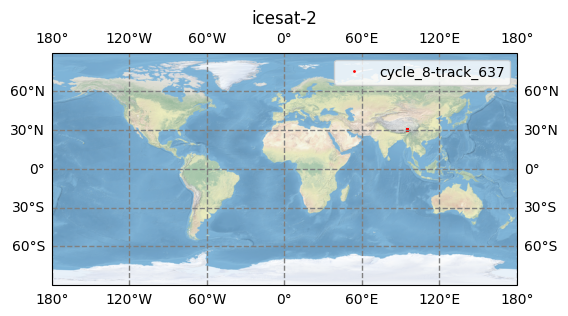

In [ ]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(6, 6))
orbit_isat = 'cycle_'+str(cycle)+'-track_'+str(track)
ax = fig.add_subplot(111, projection=proj);
ax.stock_img()
ax.plot(lon_gt1l, lat_gt1l, marker='.', markersize=2, linewidth=0.0, label=orbit_isat, color='red')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
ax.legend();
plt.title('icesat-2')


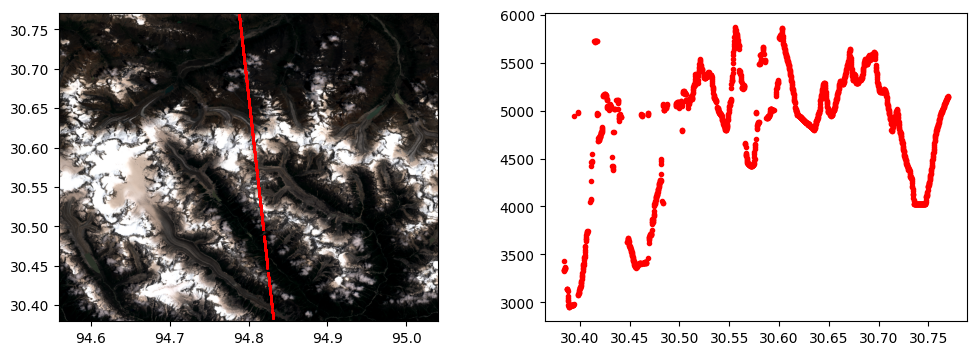

In [ ]:
region = [94.56, 30.38, 95.04, 30.77]
### gt1l
ids_gt1l = np.where((lat_gt1l>region[1]) & (lat_gt1l<region[3]) & \
               (lon_gt1l>region[0]) & (lon_gt1l<region[2]) & \
                (elev_gt1l<9000))
fig, ax = plt.subplots(1,2, figsize=(12, 4))
imgShow(rsimg.array, extent=rsimg.geoextent, clip_percent=5, ax=ax[0])
ax[0].scatter(x=lon_gt1l[ids_gt1l], y=lat_gt1l[ids_gt1l], s=1, color='red')
ax[1].plot(lat_gt1l[ids_gt1l], elev_gt1l[ids_gt1l], 'r.')



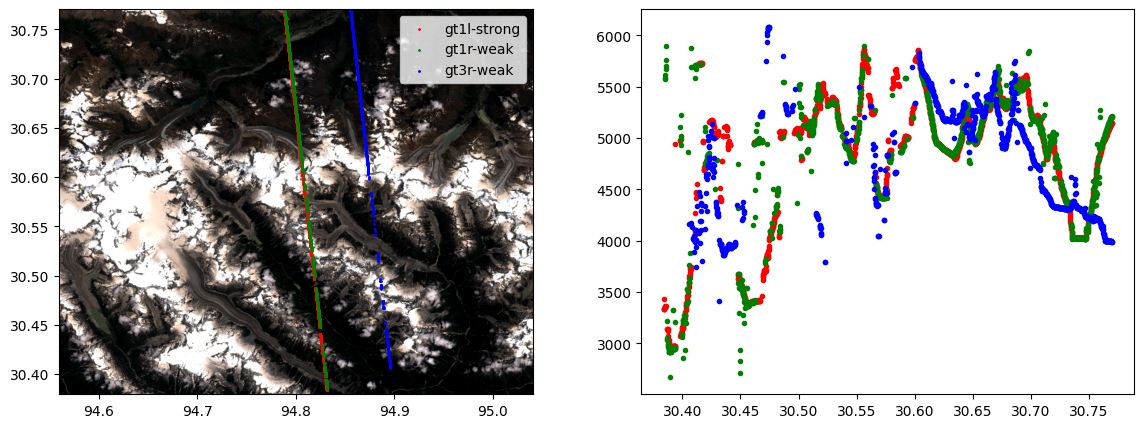

In [ ]:
### gt1l vs. gt1r, gt3r
ids_gt1l = np.where((lat_gt1l>region[1]) & (lat_gt1l<region[3]) & \
               (lon_gt1l>region[0]) & (lon_gt1l<region[2]) & \
                (elev_gt1l<9000))
ids_gt1r = np.where((lat_gt1r>region[1]) & (lat_gt1r<region[3]) & \
               (lon_gt1r>region[0]) & (lon_gt1r<region[2]) & \
                (elev_gt1r<9000))
ids_gt3r = np.where((lat_gt3r>region[1]) & (lat_gt3r<region[3]) & \
               (lon_gt3r>region[0]) & (lon_gt3r<region[2]) & \
                (elev_gt3r<9000))
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
imgShow(rsimg.array, extent=rsimg.geoextent, clip_percent=10, ax=ax[0])
ax[0].scatter(x=lon_gt1l[ids_gt1l], y=lat_gt1l[ids_gt1l], s=1, color='red', label='gt1l-'+beam_type_gt1l)
ax[0].scatter(x=lon_gt1r[ids_gt1r], y=lat_gt1r[ids_gt1r], s=1, color='green', label='gt1r-'+beam_type_gt1r)
ax[0].scatter(x=lon_gt3r[ids_gt3r], y=lat_gt3r[ids_gt3r], s=1, color='blue', label='gt3r-'+beam_type_gt1r)
ax[0].legend()
ax[1].plot(lat_gt1l[ids_gt1l], elev_gt1l[ids_gt1l], '.', color='red', label='gt1l-'+beam_type_gt1l)
ax[1].plot(lat_gt1r[ids_gt1r], elev_gt1r[ids_gt1r], '.', color='green', label='gt1r-'+beam_type_gt1r)
ax[1].plot(lat_gt3r[ids_gt3r], elev_gt3r[ids_gt3r], '.', color='blue', label='gt3r-'+beam_type_gt3r)

